# Курсова робота з дисципліни  «Математичне моделювання» за темою:
# «Оптимізація розміщення пожежної станції»
 
 ### Виконала: cтудентка групи КМ-02, Чернецька Д.П.

## Мета 

 Метою роботи є визначення оптимального місця розташування пожежної станції з урахуванням мінімізації часу прибуття пожежників та мінімізації збитку, що виник внаслідок пожежі. 
 
## Об'єкт що досліджується. 

Об’єктом дослідження є пожежна станція Житомирської області (м. Малин).

## Завдання

Розв’язати задачу мінімізації використовуючи граф вулиць, знайти оптимальне місце для розташування пожежної станції.  


## Основна частина

Пожежні та рятувальні служби є одними з найважливіших державних послуг, які надаються урядом для захисту людей, власності та навколишнього середовища від пожеж та інших надзвичайних ситуацій. Ефективне розгортання пожежних станцій має важливе значення для забезпечення своєчасного реагування на виклики служби. 

За  результатами  наукових  досліджень  визначено  залежність кількості залучених пожежних автомобілів, людських ресурсів та тривалості гасіння пожежі від часу прибуття підрозділів пожежної охорони до місця виклику. 

#### На основі статистичних даних встановлено: якщо час прибуття на  пожежу  підрозділів  пожежної  охорони  складає  понад 20 хв, то тривалість гасіння пожежі збільшується в 5 та більше разів,  у  3  рази  більше  залучається  основних  та  допоміжних пожежних автомобілів та до 3 разів більше людських ресурсів порівняно з часом прибуття до місця пожежі менше 20 хв. 


![photo1.jpg](attachment:photo1.jpg)

                                   Рис.1 - Статистика даних за 2020-2021 роки

#### Відповідно до нормативів, по місту пожежники мають бути на місці виклику через 10 хвилин, якщо ж надзвичайна ситуація трапилася за межами населеного пункту, то час збільшується до 20 хвилин
#### Vруху - середня швидкість руху пожежно-рятувальних автомобілів (приймається на дорогах з твердим покриттям — 45 км/год, на грунтових дорогах — 30 км/год, на складних ділянках з інтенсивним рухом — 25 км/год). 
#### В нашому випадку дороги частково грунтові, частково з твердим покриттям. Тому варто взяти корегуючі коефіцієнти - 𝛼1 = 1/45, 𝛼2 = 1/30 (𝛼1 - тверде покриття, 𝛼2 - грунтові дороги) 


<img src="photo2.jpg" width="800" />

<img src="photo4.jpg" width="800" />

## Алгоритм Дейкстри для знаходження оптимального місця для пожежної станції


<img src="photo.jpg" width="800" />

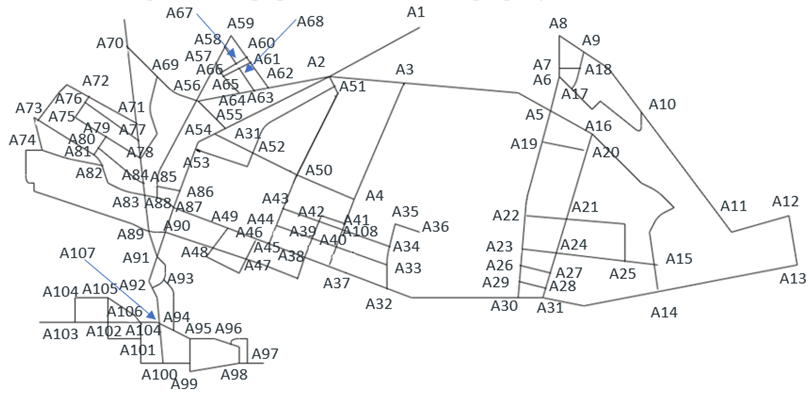

                                    Рис.2-3 - Побудова графа на основі даних Google Maps

Ідея полягає в тому, щоб знайти мінімальний час доїзду до кожного з будинків, це повторити для кожної точки на графі, тобто теоретичного місця знаходження станції. Потім знайти суми мінімального часу доїзду до кожного з будинків  для кожної з точок. Точка, якій відповідає мінімальна сума і буде оптимальним місцем.

Для розв’язання даної задачі будемо використовувати Алгоритм Дейкстри— алгоритм на графах, відкритий Дейкстрою. Знаходить найкоротший шлях від однієї вершини графу до всіх інших вершин.
Алгоритм.
1. Починаємо у вузлі . В списку вершин привласнюємо їй значення (0, 0) і робимо її постійною.
2. Основний крок. Для останньої вершини , визначеної як постійну, оцінюємо відстані з початку шляху через постійну вершину k до усіх суміжних вершин. Для цього знаходимо суму m і ваги ребра t з вершини vk до суміжної вершини vs і порівнюємо з наявним значенням в списку вершин. Якщо отриманий шлях менший за наявний, привласнюємо вершині vs значення (m+t, k). Статус вершини vs встановлюємо як тимчасова вершина.
3. Для усіх тимчасових вершин виконуємо пошук мінімального значення відстані з початку в поточну вершину. Перша тимчасова вершина з мінімальною відстанню отримує статус постійною.
4. Якщо остання постійна вершина не кінцева, переходимо до пункту 2. Інакше відстань, присвоєна їй, є мінімальною відстанню між заданими вершинами
5. Для знаходження шляху необхідно почати з кінцевої вершини і переглядати список вершин в зворотному порядку, поки не доберемося в початок.

## Cтворення класу, матриця суміжності

In [16]:
import math
class Node:
    # Ініціалізує вузол з заданими даними та індексом

    def __init__(self, data, indexloc=None):
        self.data = data
        self.index = indexloc


class Graph:

    @classmethod
    def create_from_nodes(self, nodes):
         #  Метод для створення графа зі списку вузлів
        return Graph(len(nodes), len(nodes), nodes)

    def __init__(self, row, col, nodes=None):
        # Ініціалізує граф із вказаною кількістю рядків та стовпців, а також списком вузлів.

        self.adj_mat = [[0] * col for _ in range(row)]
        self.nodes = nodes
        for i in range(len(self.nodes)):
            self.nodes[i].index = i


    def connect_dir(self, node1, node2, weight=1):
        # З'єднує два вузли
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = weight


    def connect(self, node1, node2, weight=1):
        # З'єднує два вузли
        self.connect_dir(node1, node2, weight)
        self.connect_dir(node2, node1, weight)


    def connections_from(self, node):
        # Повертає список з'єднань з заданого вузла.
        node = self.get_index_from_node(node)
        return [(self.nodes[col_num], self.adj_mat[node][col_num]) for col_num in range(len(self.adj_mat[node])) if
                self.adj_mat[node][col_num] != 0]

    def print_adj_mat(self):
        # Виводить матрицю суміжності 
        for row in self.adj_mat:
            print(row)


    def get_index_from_node(self, node):
        # Повертає індекс вузла
        if not isinstance(node, Node) and not isinstance(node, int):
            raise ValueError("node must be an integer or a Node object")
        if isinstance(node, int):
            return node
        else:
            return node.index

    def dijkstra(self, node):
        # Алгоритм Дейкстри для знаходження найкоротших шляхів від заданого вузла до всіх інших
        nodenum = self.get_index_from_node(node)

        dist = [None] * len(self.nodes)
        for i in range(len(dist)):
            dist[i] = [float("inf")]
            dist[i].append([self.nodes[nodenum]])

        dist[nodenum][0] = 0

        queue = [i for i in range(len(self.nodes))]

        seen = set()
        while len(queue) > 0:

            min_dist = float("inf")
            min_node = None
            for n in queue:
                if dist[n][0] < min_dist and n not in seen:
                    min_dist = dist[n][0]
                    min_node = n

            queue.remove(min_node)
            seen.add(min_node)
            connections = self.connections_from(min_node)
            for (node, weight) in connections:
                tot_dist = weight + min_dist
                if tot_dist < dist[node.index][0]:
                    if node.index == 72 or node.index == 91: 
                        dist[node.index][0] = 1.5*tot_dist    
                    elif node.index == 1 or node.index == 77 or node.index == 94:
                        dist[node.index][0] = 1.3*tot_dist  
                    else:
                        dist[node.index][0] = tot_dist 
                        
                    if  dist[node.index][0] > 10:
                        dist[node.index][0] *= (math.e)**(dist[node.index][0]/10)
                    dist[node.index][1] = list(dist[min_node][1])
                    dist[node.index][1].append(node)
                
        return dist

    def dijkstra2(self, node):
        nodenum = self.get_index_from_node(node)

        dist = [None] * len(self.nodes)
        for i in range(len(dist)):
            dist[i] = [float("inf")]
            dist[i].append([self.nodes[nodenum]])

        dist[nodenum][0] = 0

        queue = [i for i in range(len(self.nodes))]

        seen = set()
        while len(queue) > 0:

            min_dist = float("inf")
            min_node = None
            for n in queue:
                if dist[n][0] < min_dist and n not in seen:
                    min_dist = dist[n][0]
                    min_node = n

            queue.remove(min_node)
            seen.add(min_node)
            connections = self.connections_from(min_node)
            for (node, weight) in connections:
                tot_dist = weight + min_dist
                dist[node.index][0] = tot_dist    
                dist[node.index][1] = list(dist[min_node][1])
                dist[node.index][1].append(node)
                
        return dist    
  

                       # Задаємо вершини
a1 = Node("A1")
a2 = Node("A2")
a3 = Node("A3")
a4 = Node("A4")
a5 = Node("A5")
a6 = Node("A6")
a7 = Node("A7")
a8 = Node("A8")
a9 = Node("A9")
a10 = Node("A10")
a11 = Node("A11")
a12 = Node("A12")
a13 = Node("A13")
a14 = Node("A14")
a15 = Node("A15")
a16 = Node("A16")
a17 = Node("A17")
a18 = Node("A18")
a19 = Node("A19")
a20 = Node("A20")
a21 = Node("A21")
a22 = Node("A22")
a23 = Node("A23")
a24 = Node("A24")
a25 = Node("A25")
a26 = Node("A26")
a27 = Node("A27")
a28 = Node("A28")
a29 = Node("A29")
a30 = Node("A30")
a31 = Node("A31")
a32 = Node("A32")
a33 = Node("A33")
a34 = Node("A34")
a35 = Node("A35")
a36 = Node("A36")
a37 = Node("A37")
a38 = Node("A38")
a39 = Node("A39")
a40 = Node("A40")
a41 = Node("A41")
a42 = Node("A42")
a43 = Node("A43")
a44 = Node("A44")
a45 = Node("A45")
a46 = Node("A46")
a47 = Node("A47")
a48 = Node("A48")
a49 = Node("A49")
a50 = Node("A50")
a51 = Node("A51")
a52 = Node("A52")
a53 = Node("A53")
a54 = Node("A54")
a55 = Node("A55")
a56 = Node("A56")
a57 = Node("A57")
a58 = Node("A58")
a59 = Node("A59")
a60 = Node("A60")
a61 = Node("A61")
a62 = Node("A62")
a63 = Node("A63")
a64 = Node("A64")
a65 = Node("A65")
a66 = Node("A66")
a67 = Node("A67")
a68 = Node("A68")
a69 = Node("A69")
a70 = Node("A70")
a71 = Node("A71")
a72 = Node("A72")
a73 = Node("A73")
a74 = Node("A74")
a75 = Node("A75")
a76 = Node("A76")
a77 = Node("A77")
a78 = Node("А78")
a79 = Node("А79")
a80 = Node("A80")
a81 = Node("A81")
a82 = Node("A82")
a83 = Node("A83")
a84 = Node("A84")
a85 = Node("A85")
a86 = Node("A86")
a87 = Node("A87")
a88 = Node("A88")
a89 = Node("A89")
a90 = Node("A90")
a91 = Node("A91")
a92 = Node("A92")
a93 = Node("A93")
a94 = Node("A94")
a95 = Node("A95")
a96 = Node("A96")
a97 = Node("A97")
a98 = Node("A98")
a99 = Node("A99")
a100 = Node("A100")
a101 = Node("A101")
a102 = Node("A102")
a103 = Node("A103")
a104 = Node("A104")
a105 = Node("A105")
a106 = Node("A106")
a107 = Node("A107")
a108 = Node("A108")
                              # Створюєм об'єкт - граф
graph = Graph.create_from_nodes([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                                   a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                                   a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60,
                                   a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80,
                                   a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100,
                                   a101, a102, a103, a104, a105, a106, a107, a108])

                  # З'єднуєм вершини - для матриці суміжності
graph.connect(a1, a2)
graph.connect(a2, a62)
graph.connect(a2, a3)
graph.connect(a2, a51)
graph.connect(a3, a4)
graph.connect(a3, a5)
graph.connect(a4, a41)
graph.connect(a4, a50)
graph.connect(a5, a6)
graph.connect(a5, a19)
graph.connect(a5, a16)
graph.connect(a6, a7)
graph.connect(a6, a17)
graph.connect(a7, a8)
graph.connect(a7, a18)
graph.connect(a8, a9)
graph.connect(a9, a18)
graph.connect(a9, a10)
graph.connect(a10, a17)
graph.connect(a10, a11)
graph.connect(a11, a12)
graph.connect(a12, a13)
graph.connect(a13, a14)
graph.connect(a14, a15)
graph.connect(a14, a31)
graph.connect(a15, a25)
graph.connect(a15, a16)
graph.connect(a16, a20)
graph.connect(a17, a18)
graph.connect(a19, a20)
graph.connect(a19, a22)
graph.connect(a20, a21)
graph.connect(a21, a22)
graph.connect(a21, a24)
graph.connect(a21, a25)
graph.connect(a22, a23)
graph.connect(a23, a24)
graph.connect(a23, a26)
graph.connect(a24, a27)
graph.connect(a24, a25)
graph.connect(a26, a27)
graph.connect(a26, a29)
graph.connect(a27, a28)
graph.connect(a28, a29)
graph.connect(a28, a31)
graph.connect(a29, a30)
graph.connect(a30, a31)
graph.connect(a30, a32)
graph.connect(a32, a33)
graph.connect(a32, a37)
graph.connect(a33, a34)
graph.connect(a33, a40)
graph.connect(a34, a35)
graph.connect(a34, a108)
graph.connect(a35, a36)
graph.connect(a37, a38)
graph.connect(a37, a40)
graph.connect(a38, a39)
graph.connect(a38, a45)
graph.connect(a38, a47)
graph.connect(a39, a40)
graph.connect(a39, a42)
graph.connect(a39, a44)
graph.connect(a40, a108)
graph.connect(a41, a108)
graph.connect(a41, a42)
graph.connect(a42, a108)
graph.connect(a42, a43)
graph.connect(a43, a44)
graph.connect(a43, a50)
graph.connect(a44, a45)
graph.connect(a45, a46)
graph.connect(a46, a47)
graph.connect(a46, a49)
graph.connect(a47, a48)
graph.connect(a48, a49)
graph.connect(a48, a90)
graph.connect(a49, a87)
graph.connect(a50, a51)
graph.connect(a50, a52)
graph.connect(a51, a52)
graph.connect(a52, a53)
graph.connect(a52, a54)
graph.connect(a53, a54)
graph.connect(a53, a86)
graph.connect(a54, a55)
graph.connect(a55, a56)
graph.connect(a56, a85)
graph.connect(a56, a57)
graph.connect(a56, a64)
graph.connect(a56, a69)
graph.connect(a57, a58)
graph.connect(a57, a66)
graph.connect(a58, a59)
graph.connect(a58, a67)
graph.connect(a59, a60)
graph.connect(a60, a67)
graph.connect(a60, a61)
graph.connect(a61, a62)
graph.connect(a61, a68)
graph.connect(a62, a63)
graph.connect(a63, a68)
graph.connect(a63, a64)
graph.connect(a64, a65)
graph.connect(a65, a66)
graph.connect(a65, a68)
graph.connect(a66, a67)
graph.connect(a69, a70)
graph.connect(a69, a78)
graph.connect(a70, a71)
graph.connect(a71, a72)
graph.connect(a71, a77)
graph.connect(a72, a73)
graph.connect(a72, a76)
graph.connect(a73, a74)
graph.connect(a73, a81)
graph.connect(a74, a82)
graph.connect(a74, a89)
graph.connect(a75, a76)
graph.connect(a75, a79)
graph.connect(a76, a77)
graph.connect(a77, a78)
graph.connect(a78, a79)
graph.connect(a78, a84)
graph.connect(a79, a80)
graph.connect(a80, a81)
graph.connect(a80, a84)
graph.connect(a81, a82)
graph.connect(a82, a83)
graph.connect(a83, a84)
graph.connect(a83, a88)
graph.connect(a83, a89)
graph.connect(a85, a86)
graph.connect(a85, a88)
graph.connect(a86, a87)
graph.connect(a87, a88)
graph.connect(a87, a90)
graph.connect(a89, a90)
graph.connect(a89, a91)
graph.connect(a90, a91)
graph.connect(a91, a92)
graph.connect(a91, a93)
graph.connect(a92, a93)
graph.connect(a92, a107)
graph.connect(a93, a94)
graph.connect(a94, a95)
graph.connect(a94, a107)
graph.connect(a95, a96)
graph.connect(a95, a99)
graph.connect(a96, a97)
graph.connect(a96, a98)
graph.connect(a97, a98)
graph.connect(a98, a99)
graph.connect(a99, a100)
graph.connect(a100, a107)
graph.connect(a100, a101)
graph.connect(a101, a102)
graph.connect(a101, a106)
graph.connect(a102, a103)
graph.connect(a102, a105)
graph.connect(a102, a106)
graph.connect(a103, a104)
graph.connect(a104, a105)
graph.connect(a105, a106)
graph.connect(a106, a107)

print('Матриця суміжності')
graph.print_adj_mat()


Матриця суміжності
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0,

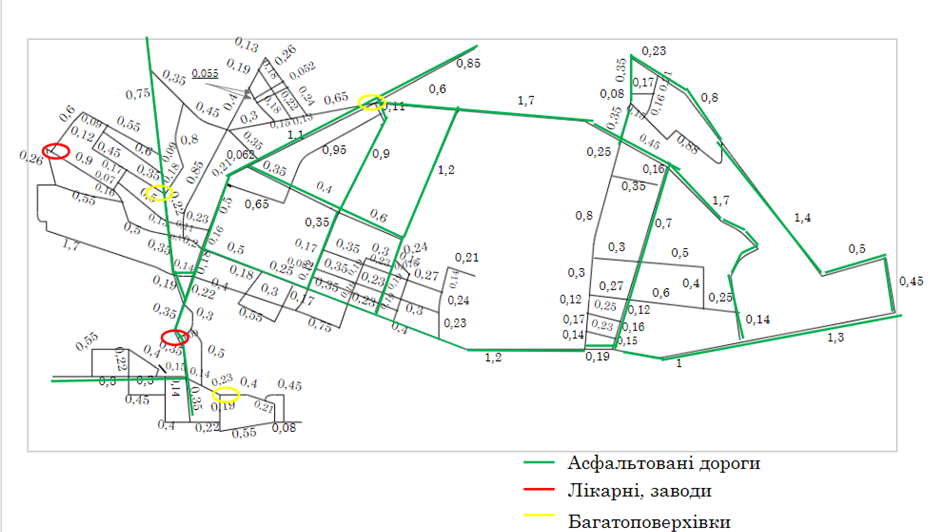


## Матриця часу проїзду пожежного автомобіля по ребрі графа (матриця відстані помножена на коефіцієнти)

Зауваження: Час розраховується у годинах

In [17]:
w_graph = Graph.create_from_nodes([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                                   a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                                   a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60,
                                   a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80,
                                   a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100,
                                   a101, a102, a103, a104, a105, a106, a107, a108])

w_graph.connect(a1, a2, round(0.85/45, 6))
w_graph.connect(a2, a62, round(0.65/30, 6))
w_graph.connect(a2, a3, round(0.6/45, 6))
w_graph.connect(a2, a51, round(0.11/45, 6))
w_graph.connect(a3, a4, round(1.2/45, 6))
w_graph.connect(a3, a5, round(1.7/45, 6))
w_graph.connect(a4, a41, round(0.24/45, 6))
w_graph.connect(a4, a50, round(0.6/45, 6))
w_graph.connect(a5, a6, round(0.35/45, 6))
w_graph.connect(a5, a19, round(0.25/30, 6))
w_graph.connect(a5, a16, round(0.45/45, 6))
w_graph.connect(a6, a17, round(0.35/45, 6))
w_graph.connect(a6, a7, round(0.08/45, 6))
w_graph.connect(a7, a8, round(0.35/45, 6))
w_graph.connect(a7, a18, round(0.17/30, 6))
w_graph.connect(a8, a9, round(0.23/45, 6))
w_graph.connect(a9, a18, round(0.21/30, 6))
w_graph.connect(a9, a10, round(0.8/45, 6))
w_graph.connect(a10, a17, round(0.88/30, 6))
w_graph.connect(a10, a11, round(1.4/45, 6))
w_graph.connect(a11, a12, round(0.5/45, 6))
w_graph.connect(a12, a13, round(0.45/45, 6))
w_graph.connect(a13, a14, round(1.3/45, 6))
w_graph.connect(a14, a15, round(0.14/45, 6))
w_graph.connect(a14, a31, round(1/45, 6))
w_graph.connect(a15, a25, round(0.25/30, 6))
w_graph.connect(a15, a16, round(1.7/45, 6))
w_graph.connect(a16, a20, round(0.16/45, 6))
w_graph.connect(a17, a18, round(0.16/30, 6))
w_graph.connect(a19, a20, round(0.35/30, 6))
w_graph.connect(a19, a22, round(0.8/30, 6))
w_graph.connect(a20, a21, round(0.7/45, 6))
w_graph.connect(a21, a22, round(0.27/30, 6))
w_graph.connect(a21, a24, round(0.35/45, 6))
w_graph.connect(a21, a25, round(0.9/30, 6))
w_graph.connect(a22, a23, round(0.3/30, 6))
w_graph.connect(a23, a24, round(0.27/30, 6))
w_graph.connect(a23, a26, round(0.12/30, 6))
w_graph.connect(a24, a27, round(0.12/45, 6))
w_graph.connect(a24, a25, round(0.6/30, 6))
w_graph.connect(a26, a27, round(0.25/30, 6))
w_graph.connect(a26, a29, round(0.17/30, 6))
w_graph.connect(a27, a28, round(0.16/45, 6))
w_graph.connect(a28, a29, round(0.23/30, 6))
w_graph.connect(a28, a31, round(0.15/45, 6))
w_graph.connect(a29, a30, round(0.14/30, 6))
w_graph.connect(a30, a31, round(0.19/45, 6))
w_graph.connect(a30, a32, round(1.2/45, 6))
w_graph.connect(a32, a33, round(0.25/30, 6))
w_graph.connect(a32, a37, round(0.4/45, 6))
w_graph.connect(a33, a34, round(0.24/30, 6))
w_graph.connect(a33, a40, round(0.3/30, 6))
w_graph.connect(a34, a35, round(0.14/30, 6))
w_graph.connect(a34, a108, round(0.27/30, 6))
w_graph.connect(a35, a36, round(0.21/30, 6))
w_graph.connect(a37, a38, round(0.23/45, 6))
w_graph.connect(a37, a40, round(0.19/45, 6))
w_graph.connect(a38, a39, round(0.19/30, 6))
w_graph.connect(a38, a45, round(0.35/45, 6))
w_graph.connect(a38, a47, round(0.75/30, 6))
w_graph.connect(a39, a40, round(0.23/30, 6))
w_graph.connect(a39, a42, round(0.19/30, 6))
w_graph.connect(a39, a44, round(0.35/30, 6))
w_graph.connect(a40, a108, round(0.19/45, 6))
w_graph.connect(a41, a108, round(0.075/45, 6))
w_graph.connect(a41, a42, round(0.3/30, 6))
w_graph.connect(a42, a108, round(0.23/30, 6))
w_graph.connect(a42, a43, round(0.35/30, 6))
w_graph.connect(a43, a44, round(0.17/45, 6))
w_graph.connect(a43, a50, round(0.35/45, 6))
w_graph.connect(a44, a45, round(0.12/45, 6))
w_graph.connect(a45, a46, round(0.1/45, 6))
w_graph.connect(a46, a47, round(0.17/30, 6))
w_graph.connect(a46, a49, round(0.25/45, 6))
w_graph.connect(a47, a48, round(0.3/30, 6))
w_graph.connect(a48, a49, round(0.18/30, 6))
w_graph.connect(a48, a90, round(0.4/30, 6))
w_graph.connect(a49, a87, round(0.5/45, 6))
w_graph.connect(a50, a51, round(0.9/45, 6))
w_graph.connect(a50, a52, round(0.4/45, 6))
w_graph.connect(a51, a52, round(0.95/30, 6))
w_graph.connect(a52, a53, round(0.65/30, 6))
w_graph.connect(a52, a54, round(0.35/45, 6))
w_graph.connect(a53, a54, round(0.21/45, 6))
w_graph.connect(a53, a86, round(0.5/45, 6))
w_graph.connect(a54, a55, round(0.062/45, 6))
w_graph.connect(a55, a56, round(0.35/30, 6))
w_graph.connect(a56, a85, round(0.85/30, 6))
w_graph.connect(a56, a57, round(0.4/30, 6))
w_graph.connect(a56, a64, round(0.3/30, 6))
w_graph.connect(a56, a69, round(0.45/30, 6))
w_graph.connect(a57, a58, round(0.19/30, 6))
w_graph.connect(a57, a66, round(0.055/30, 6))
w_graph.connect(a58, a59, round(0.13/30, 6))
w_graph.connect(a58, a67, round(0.18/30, 6))
w_graph.connect(a59, a60, round(0.26/30, 6))
w_graph.connect(a60, a67, round(0.12/30, 6))
w_graph.connect(a60, a61, round(0.052/30, 6))
w_graph.connect(a61, a62, round(0.24/30, 6))
w_graph.connect(a61, a68, round(0.12/30, 6))
w_graph.connect(a62, a63, round(0.13/30, 6))
w_graph.connect(a63, a68, round(0.22/30, 6))
w_graph.connect(a63, a64, round(0.15/30, 6))
w_graph.connect(a64, a65, round(0.18/30, 6))
w_graph.connect(a65, a66, round(0.055/30, 6))
w_graph.connect(a65, a68, round(0.12/30, 6))
w_graph.connect(a66, a67, round(0.12/30, 6))
w_graph.connect(a69, a70, round(0.35/30, 6))
w_graph.connect(a69, a78, round(0.8/30, 6))
w_graph.connect(a70, a71, round(0.75/45, 6))
w_graph.connect(a71, a72, round(0.55/30, 6))
w_graph.connect(a71, a77, round(0.09/45, 6))
w_graph.connect(a72, a73, round(0.6/30, 6))
w_graph.connect(a72, a76, round(0.09/30, 6))
w_graph.connect(a73, a74, round(0.26/30, 6))
w_graph.connect(a73, a81, round(0.9/30, 6))
w_graph.connect(a74, a82, round(0.55/30, 6))
w_graph.connect(a74, a89, round(1.7/30, 6))
w_graph.connect(a75, a76, round(0.12/30, 6))
w_graph.connect(a75, a79, round(0.45/30, 6))
w_graph.connect(a76, a77, round(0.6/30, 6))
w_graph.connect(a77, a78, round(0.18/45, 6))
w_graph.connect(a78, a79, round(0.35/30, 6))
w_graph.connect(a78, a84, round(0.22/45, 6))
w_graph.connect(a79, a80, round(0.17/30, 6))
w_graph.connect(a80, a81, round(0.07/30, 6))
w_graph.connect(a80, a84, round(0.5/30, 6))
w_graph.connect(a81, a82, round(0.16/30, 6))
w_graph.connect(a82, a83, round(0.5/30, 6))
w_graph.connect(a83, a84, round(0.13/45, 6))
w_graph.connect(a83, a88, round(0.1/30, 6))
w_graph.connect(a83, a89, round(0.35/45, 6))
w_graph.connect(a85, a86, round(0.23/30, 6))
w_graph.connect(a85, a88, round(0.11/30, 6))
w_graph.connect(a86, a87, round(0.16/45, 6))
w_graph.connect(a87, a88, round(0.2/30, 6))
w_graph.connect(a87, a90, round(0.18/45, 6))
w_graph.connect(a89, a90, round(0.14/45, 6))
w_graph.connect(a89, a91, round(0.19/45, 6))
w_graph.connect(a90, a91, round(0.22/45, 6))
w_graph.connect(a91, a92, round(0.35/45, 6))
w_graph.connect(a91, a93, round(0.3/30, 6))
w_graph.connect(a92, a93, round(0.09/30, 6))
w_graph.connect(a92, a107, round(0.35/45, 6))
w_graph.connect(a93, a94, round(0.5/30, 6))
w_graph.connect(a94, a95, round(0.23/30, 6))
w_graph.connect(a94, a107, round(0.14/30, 6))
w_graph.connect(a95, a96, round(0.4/30, 6))
w_graph.connect(a95, a99, round(0.19/30, 6))
w_graph.connect(a96, a97, round(0.45/30, 6))
w_graph.connect(a96, a98, round(0.21/30, 6))
w_graph.connect(a97, a98, round(0.08/30, 6))
w_graph.connect(a98, a99, round(0.55/30, 6))
w_graph.connect(a99, a100, round(0.22/30, 6))
w_graph.connect(a100, a107, round(0.35/45, 6))
w_graph.connect(a100, a101, round(0.4/30, 6))
w_graph.connect(a101, a102, round(0.45/30, 6))
w_graph.connect(a101, a106, round(0.14/30, 6))
w_graph.connect(a102, a103, round(0.3/45, 6))
w_graph.connect(a102, a105, round(0.22/30, 6))
w_graph.connect(a102, a106, round(0.3/45, 6))
w_graph.connect(a103, a104, round(0.25/30, 6))
w_graph.connect(a104, a105, round(0.3/30, 6))
w_graph.connect(a105, a106, round(0.4/30, 6))
w_graph.connect(a106, a107, round(0.15/45, 6))

w_graph.print_adj_mat()


[0, 0.018889, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.018889, 0, 0.013333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.021667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.013333, 0, 0.026667, 0.037778, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Фінальний етап - пошук сум для кожної точки на графі

In [18]:
def find_sum(a):
    lst =[]
    summ = 0
    for (weight, node) in w_graph.dijkstra(a):
        lst.append(weight)
    for i in range(len(lst)):
        summ += lst[i]
    return summ
summm = []
num = 1
print('Отримані суми: ')
for el in [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20,
                                   a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40,
                                   a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60,
                                   a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80,
                                   a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100,
                                   a101, a102, a103, a104, a105, a106, a107, a108]:
    print('a'+ str(num)+ ':',  find_sum(el))
    summm.append(find_sum(el))
    num += 1

print('Оптимальна точка:')    
print('a87:', min(summm))    

Отримані суми: 
a1: 10.336310620000003
a2: 7.688450600000001
a3: 8.441280539999998
a4: 7.053830500000001
a5: 10.81523279
a6: 11.559875500000002
a7: 11.734297300000001
a8: 12.528207100000001
a9: 13.016373999999997
a10: 14.884948799999993
a11: 15.570899300000004
a12: 14.726296199999995
a13: 13.823851200000004
a14: 10.966955399999998
a15: 11.202235600000003
a16: 11.007037300000002
a17: 12.369337300000002
a18: 12.301674
a19: 11.447216
a20: 10.9479233
a21: 10.2309395
a22: 10.690408399999999
a23: 9.883962400000001
a24: 9.673048200000002
a25: 11.625701200000005
a26: 9.4583214
a27: 9.367439999999998
a28: 9.109785200000003
a29: 8.9998858
a30: 8.595555200000002
a31: 8.875362800000001
a32: 7.0388367
a33: 7.441526700000002
a34: 7.586733800000001
a35: 8.085169400000002
a36: 8.846769400000001
a37: 6.545204500000003
a38: 6.326006450000001
a39: 6.811426700000001
a40: 6.6901956999999985
a41: 6.8661791
a42: 6.902074900000002
a43: 6.2847862999999995
a44: 6.177037200000001
a45: 6.08435175
a46: 6.09655965


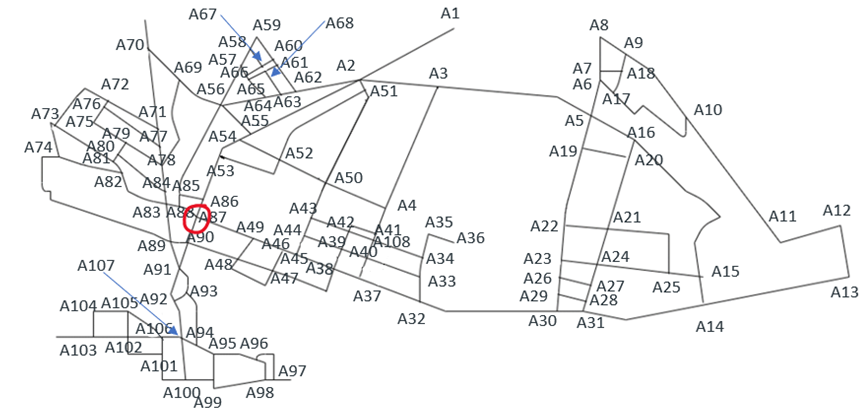


In [20]:
print('Оптимальний маршрут руху та приблизний час доїзду(у хв.) до кожного будинку')
for (weight, node) in w_graph.dijkstra2(a87):
        print('\n'+str((weight*60, [n.data for n in node])))

Оптимальний маршрут руху та приблизний час доїзду(у хв.) до кожного будинку

(4.64004, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A1'])

(5.77338, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A1', 'A2'])

(8.84004, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A3', 'A5', 'A3'])

(5.9067, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A3', 'A4'])

(8.173440000000001, ['A87', 'A49', 'A46', 'A45', 'A38', 'A37', 'A32', 'A30', 'A29', 'A26', 'A23', 'A22', 'A21', 'A20', 'A19', 'A5'])

(8.2734, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7', 'A18', 'A17', 'A6'])

(8.08008, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A7'])

(8.22672, ['A87', 'A86', 'A53', 'A54', 'A52', 'A50', 'A51', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A8'])

(11.56002, ['A87', 'A49', 'A46', 'A45', 'A38', 'A37', 'A32', 'A30', 'A31', 'A14', 'A13', 'A12', 'A11', 'A10', 'A9'])

(10.493340000000002, ['A87'

## Висновки.

Було знайдено оптимальне місце розташування пожежної станції (Точка A87, місцеположення можна звірити з картою і визначити точне роташування) з урахуванням мінімізації часу прибуття пожежників та зважаючи на об'єкти критичного значення - лікарні та підприємства. Відповідно сумарна відстань з даної точки до інших із застосованими до неї штрафними функціями є найменшою. Якщо не застосовувати штрафну функцію, то ми отримаємо точку A45, якщо подивитися на карту то з штрафними точками місце розміщення пожежної станції зсунулось вліво, ближче до місця розташувань лікарень та заводів, яким ми надали пріоритет.

## Література


1. ScienceDirect. Location optimization of urban fire stations: Access and service coverage. URL: https://www.sciencedirect.com/science/article/pii/S0198971517305525
2. Journal of Environmental Research, Engineering and Management Vol. 78 / No. 1 / 2022 pp. 97–104 DOI 10.5755/j01.erem.78.1.25581. Optimization of Fire Station Locations to Increase the Efficiency of Firefighting in Natural Ecosystems. URL: https://sci.ldubgd.edu.ua/jspui/bitstream/123456789/10349/1/25581-Article%20Text-108306-1-10-20220401.pdf
3. АНАЛІТИЧНА ДОВІДКА про пожежі та їх наслідки в Україні за 9 місяців 2021 року. URL: https://idundcz.dsns.gov.ua/upload/5/3/8/5/7/8/2021-ctatuctuka-analitychna-dovidka-pro-pojeji-092021.pdf